In [1]:
import pandas as pd
import sys
sys.path.append('../Util')
import BERTopicUtils as btu
from llama_cpp import Llama
from bertopic import BERTopic

c:\Users\dommy\miniconda3\envs\gestione\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
PATH = '../Analyze_files/CombiningAnalysisCompleteDataset'

In [29]:
bt_content = BERTopic.load(f"{PATH}/ContentAnalysis/ModelsContent/topic_model_all-MiniLM-L6-v2_190_20n_8dim", embedding_model='all-MiniLM-L6-v2')
bt_thread = BERTopic.load(f"{PATH}/ThreadAnalysis/Models/topic_model_all-MiniLM-L6-v2_150_20n", embedding_model='all-MiniLM-L6-v2')

In [53]:
merged_model_thread_content = BERTopic.merge_models([bt_thread, bt_content], min_similarity=.8, embedding_model='all-MiniLM-L6-v2')
merged_model_content_thread = BERTopic.merge_models([bt_content, bt_thread], min_similarity=.8, embedding_model='all-MiniLM-L6-v2')

In [7]:
print(len(merged_model_thread_content.get_topic_info()))
print(len(merged_model_content_thread.get_topic_info()))

120
133


In [8]:
merged_model_content_thread.get_topic_info()

Topic   Count                                         Name  \
0       -1  110608                    -1_vendor_order_nt_market   
1        0   19104                       0_cart_weed_strain_thc   
2        1    6011                 1_deposit_address_ticket_btc   
3        2    6350                    2_key_pgp_account_pgp key   
4        3    3368                  3_order_shipped_ordered_day   
..     ...     ...                                          ...   
128    127     397   40_withdraw_withdrawal_withdrawl_withdraws   
129    128     281        48_heard_happened_anyone_anyone heard   
130    129     308              49_benzos_benzo_rc_benzo vendor   
131    130     326  50_fraud_fraudsters_fraud vendor_loan fraud   
132    131     178           67_mephedrone_meopcp_mxe_mescaline   

                                        Representation  Representative_Docs  
0    [vendor, order, nt, market, link, get, like, t...                  NaN  
1    [cart, weed, strain, thc, bud, price, product,...                  NaN  
2    [deposit, address, ticket, btc, wallet, deposi...                  NaN  
3    [key, pgp, account, pgp key, password, message...                  NaN  
4    [order, shipped, ordered, day, week, marked, p...                  NaN  
..                                                 ...                  ...  
128  [withdraw, withdrawal, withdrawl, withdraws, b...                  NaN  
129  [heard, happened, anyone, anyone heard, thewiz...                  NaN  
130  [benzos, benzo, rc, benzo vendor, rc benzos, b...                  NaN  
131  [fraud, fraudsters, fraud vendor, loan fraud, ...                  NaN  
132  [mephedrone, meopcp, mxe, mescaline, mmc, meph...                  NaN  

[133 rows x 5 columns]

In [9]:
bt_content.get_topic_info().tail(5)

Topic  Count                                           Name  \
117    116   1754                   116_water_acetone_powder_dry   
118    117    218  117_witchman_link witchman_link_witchman link   
119    118    210  118_tochka_market_tochka market_tochka tochka   
120    119   2589   119_post_know guy know_guy know guy_know guy   
121    120    509                120_subdread_sub_post_subdreads   

                              CustomName  \
117             water - powder - acetone   
118             witchman - witchman link   
119      tochka market - market - tochka   
120  know guy know - post - guy know guy   
121                subdread - sub - post   

                                        Representation  \
117  [water, acetone, powder, dry, ml, solution, di...   
118  [witchman, link witchman, link, witchman link,...   
119  [tochka, market, tochka market, tochka tochka,...   
120  [post, know guy know, guy know guy, know guy, ...   
121  [subdread, sub, post, subdreads, create, dread...   

                                   Representative_Docs  
117  [acetone wash basic bare minimum lazy simple w...  
118  [try witchman, link rtuna rtuna link link witc...  
119               [tochka really, tochka good, tochka]  
120  [totally read robin williams voice great guy s...  
121  [found subdread, neither subdread, tried creat...

In [10]:
merged_model_content_thread.get_topic_info().tail(15)

Topic  Count                                               Name  \
118    117    218      117_witchman_link witchman_link_witchman link   
119    118    210      118_tochka_market_tochka market_tochka tochka   
120    119   2589       119_post_know guy know_guy know guy_know guy   
121    120    509                    120_subdread_sub_post_subdreads   
122    121    999  10_crosspost_giveaway_review crosspost_crosspo...   
123    122    608                         21_oxycodone_mg_oxy_opiate   
124    123    556                 23_drug_drugsuk_drugs_selling drug   
125    124    471                       31_hacked_hacker_hacking_job   
126    125    470                      32_login_account_password_log   
127    126    382                            38_cc_cvv_vbv_cc vendor   
128    127    397         40_withdraw_withdrawal_withdrawl_withdraws   
129    128    281              48_heard_happened_anyone_anyone heard   
130    129    308                    49_benzos_benzo_rc_benzo vendor   
131    130    326        50_fraud_fraudsters_fraud vendor_loan fraud   
132    131    178                 67_mephedrone_meopcp_mxe_mescaline   

                                        Representation  Representative_Docs  
118  [witchman, link witchman, link, witchman link,...                  NaN  
119  [tochka, market, tochka market, tochka tochka,...                  NaN  
120  [post, know guy know, guy know guy, know guy, ...                  NaN  
121  [subdread, sub, post, subdreads, create, dread...                  NaN  
122  [crosspost, giveaway, review crosspost, crossp...                  NaN  
123  [oxycodone, mg, oxy, opiate, opiateconnect, ox...                  NaN  
124  [drug, drugsuk, drugs, selling drug, drug deal...                  NaN  
125  [hacked, hacker, hacking, job, lfw, malware, h...                  NaN  
126  [login, account, password, log, fa, error, reg...                  NaN  
127  [cc, cvv, vbv, cc vendor, cc cvv, non, non vbv...                  NaN  
128  [withdraw, withdrawal, withdrawl, withdraws, b...                  NaN  
129  [heard, happened, anyone, anyone heard, thewiz...                  NaN  
130  [benzos, benzo, rc, benzo vendor, rc benzos, b...                  NaN  
131  [fraud, fraudsters, fraud vendor, loan fraud, ...                  NaN  
132  [mephedrone, meopcp, mxe, mescaline, mmc, meph...                  NaN

In [16]:
df = merged_model_content_thread.get_topic_info()
df = df[df['Topic'] != -1]
df['Topic'] = df['Topic'].astype(int)
df['Representative_Docs'] = df['Representative_Docs'].fillna('')
df

Topic  Count                                         Name  \
1        0  19104                       0_cart_weed_strain_thc   
2        1   6011                 1_deposit_address_ticket_btc   
3        2   6350                    2_key_pgp_account_pgp key   
4        3   3368                  3_order_shipped_ordered_day   
5        4   4836      4_scam_scammer_scam scam_scam scam scam   
..     ...    ...                                          ...   
128    127    397   40_withdraw_withdrawal_withdrawl_withdraws   
129    128    281        48_heard_happened_anyone_anyone heard   
130    129    308              49_benzos_benzo_rc_benzo vendor   
131    130    326  50_fraud_fraudsters_fraud vendor_loan fraud   
132    131    178           67_mephedrone_meopcp_mxe_mescaline   

                                        Representation Representative_Docs  
1    [cart, weed, strain, thc, bud, price, product,...                      
2    [deposit, address, ticket, btc, wallet, deposi...                      
3    [key, pgp, account, pgp key, password, message...                      
4    [order, shipped, ordered, day, week, marked, p...                      
5    [scam, scammer, scam scam, scam scam scam, sca...                      
..                                                 ...                 ...  
128  [withdraw, withdrawal, withdrawl, withdraws, b...                      
129  [heard, happened, anyone, anyone heard, thewiz...                      
130  [benzos, benzo, rc, benzo vendor, rc benzos, b...                      
131  [fraud, fraudsters, fraud vendor, loan fraud, ...                      
132  [mephedrone, meopcp, mxe, mescaline, mmc, meph...                      

[132 rows x 5 columns]

In [17]:
# Use llama.cpp to load a Quantized LLM
llm = Llama(model_path="../openhermes-2.5-mistral-7b.Q4_K_M.gguf", n_gpu_layers=-1, n_ctx=9096, stop=["Q:", "\n"])
topic_label = btu.process_dataset(llm, df) # 480 minutes 

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from ../openhermes-2.5-mistral-7b.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = teknium_openhermes-2.5-mistral-7b
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336


llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 32
llama_model_loader: - kv   8:              llama.attention.head_count_kv u32              = 8
llama_model_loader: - kv   9:     llama.attention.layer_norm_rms_epsilon f32              = 0.000010
llama_model_loader: - kv  10:                       llama.rope.freq_base f32              = 10000.000000
llama_model_loader: - kv  11:                          general.file_type u32              = 15
llama_model_loader: - kv  12:                       tokenizer.ggml.model str              = llama
llama_model_loader: - kv  13:                      tokenizer.ggml.tokens arr[str,32002]   = ["<unk>", "<s>", "</s>", "<0x00>", "<...
llama_model_loader: - kv  14:                      tokenizer.ggml.scores arr[f32,32002]   = [0.000000, 0.000000, 0.000000, 0.0000...
llama_model_loader: - kv  15:                  tok

In [18]:
topic_label.to_csv("LLAMA_label.csv", index=False)

In [24]:
topic_label = pd.read_csv('LLAMA_label.csv')

In [25]:
merged_model_content_thread.set_topic_labels(topic_label.set_index('Topic')['Label'].to_dict())

In [26]:
merged_model_content_thread.visualize_hierarchy(custom_labels=True)

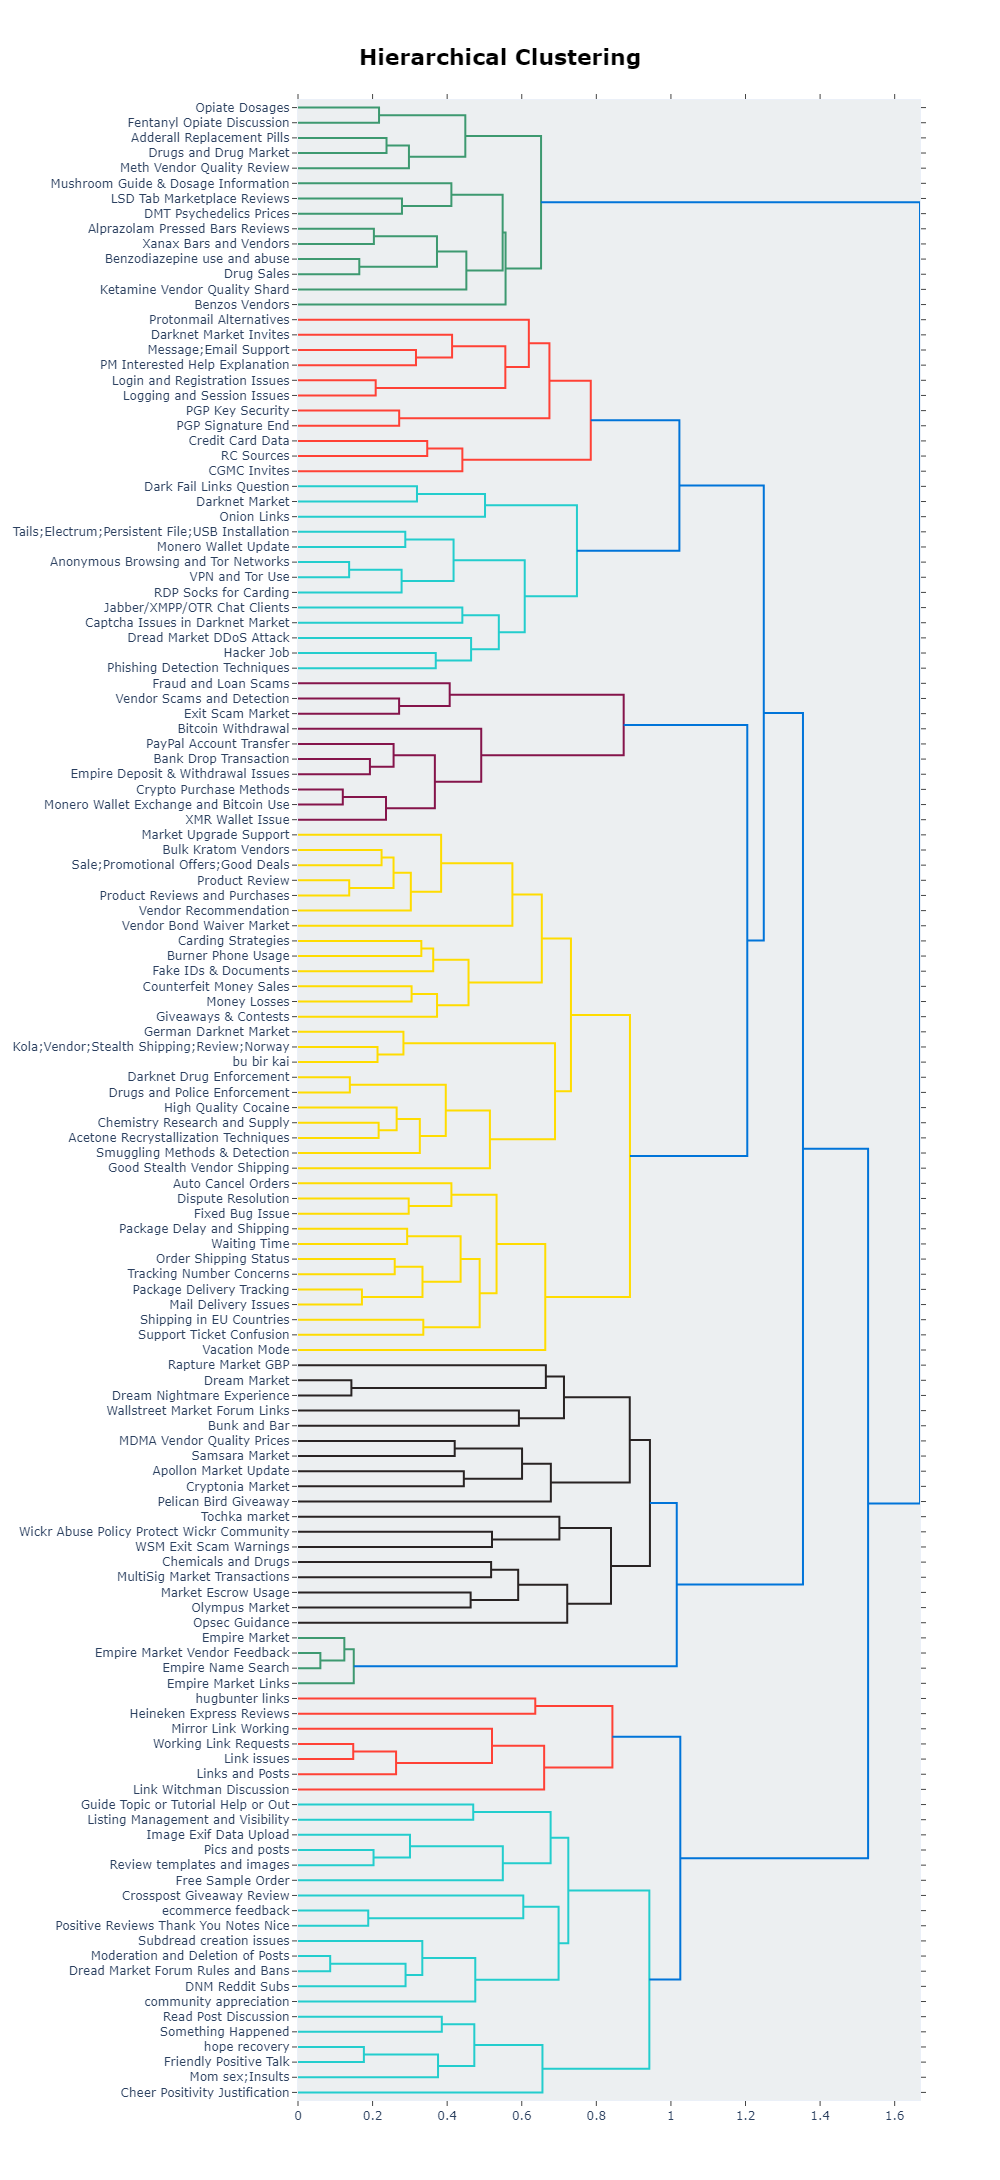
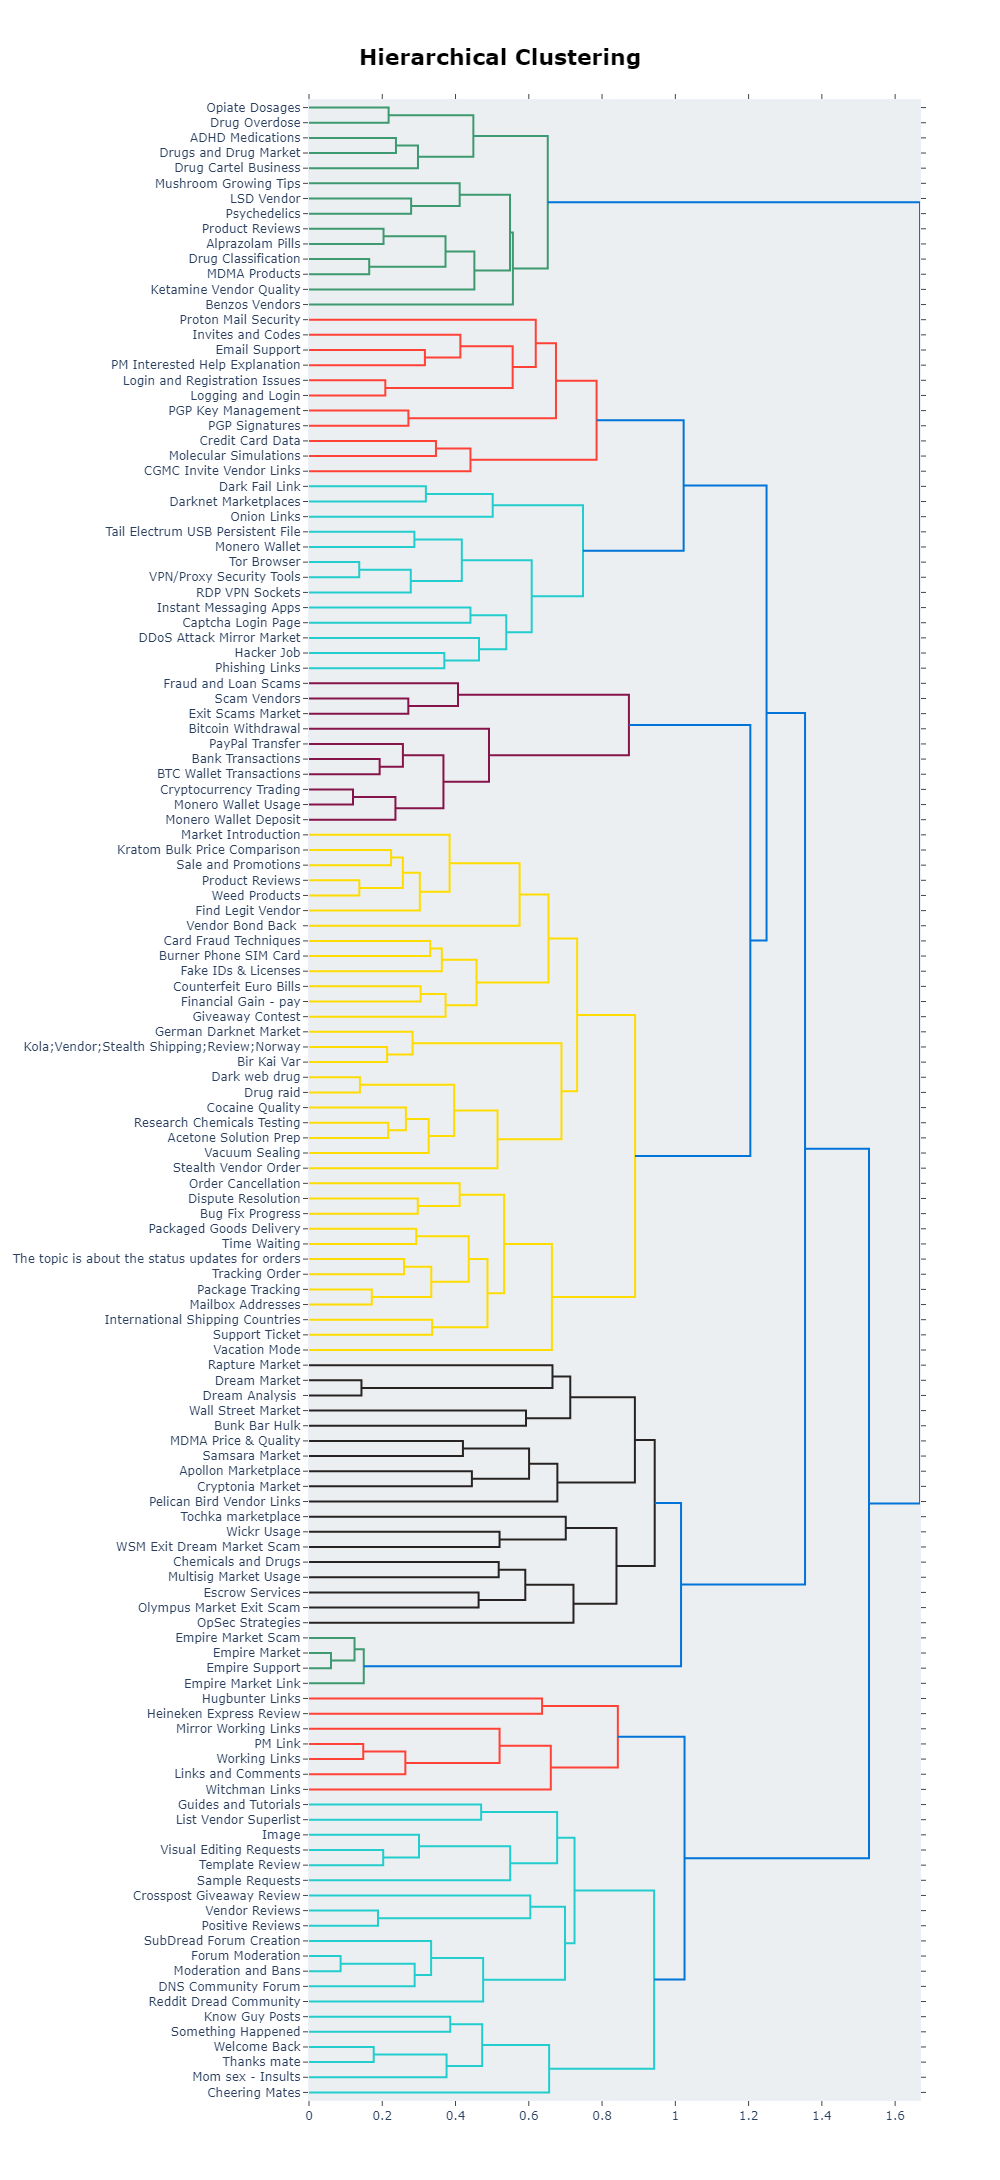

In [27]:
merged_model_content_thread.visualize_heatmap(custom_labels=True)

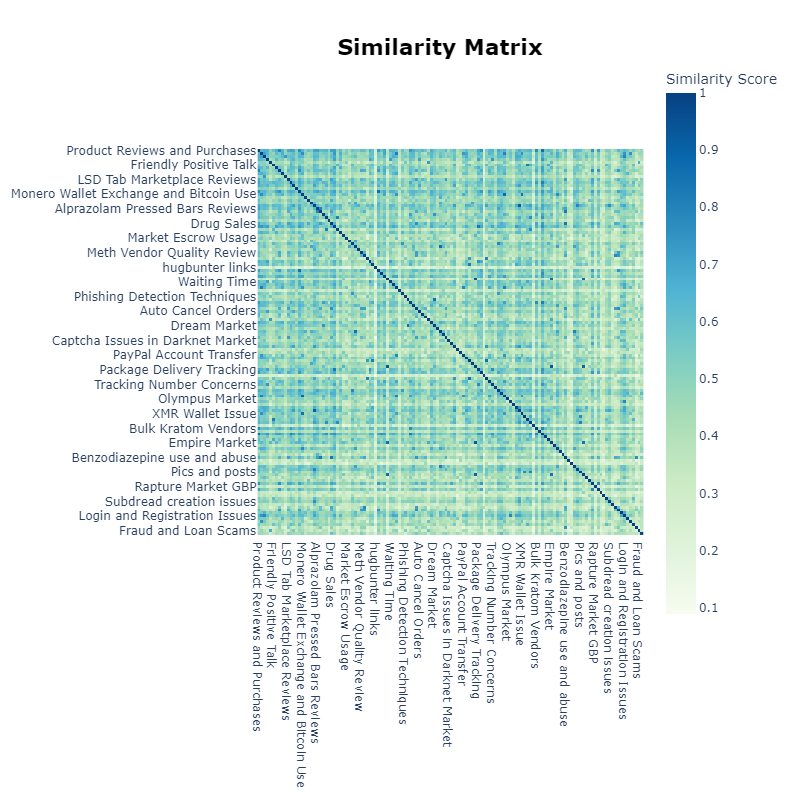
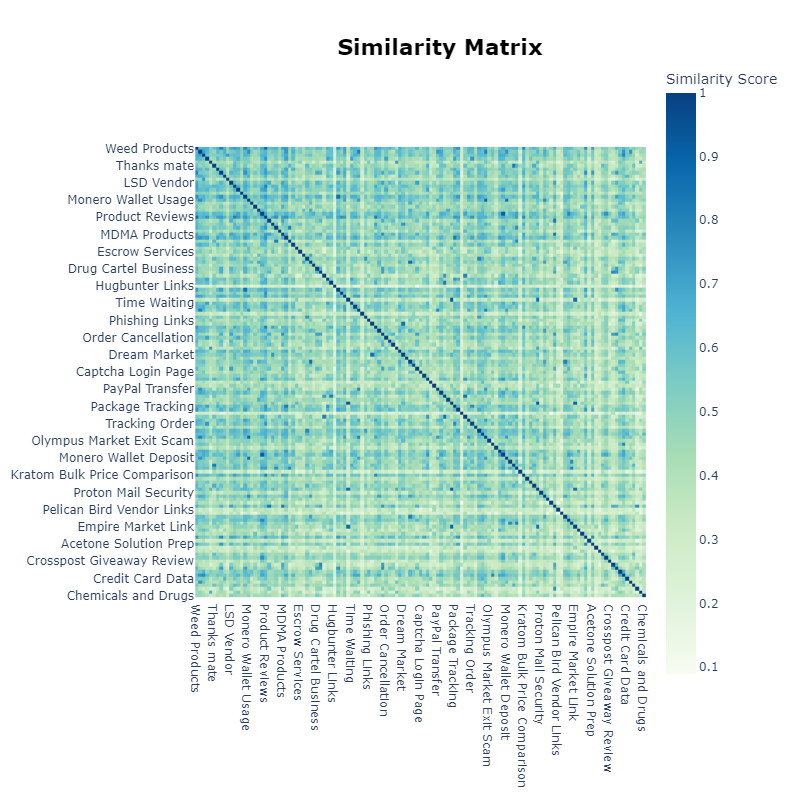

In [28]:
merged_model_content_thread.visualize_topics()

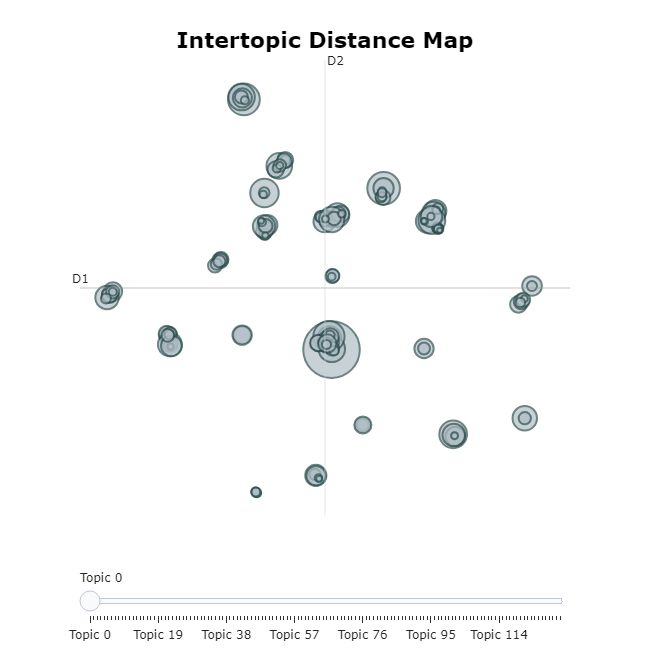

In [29]:
merged_model_content_thread.visualize_barchart(top_n_topics=250, custom_labels=True, n_words=10, width=350, height=350)

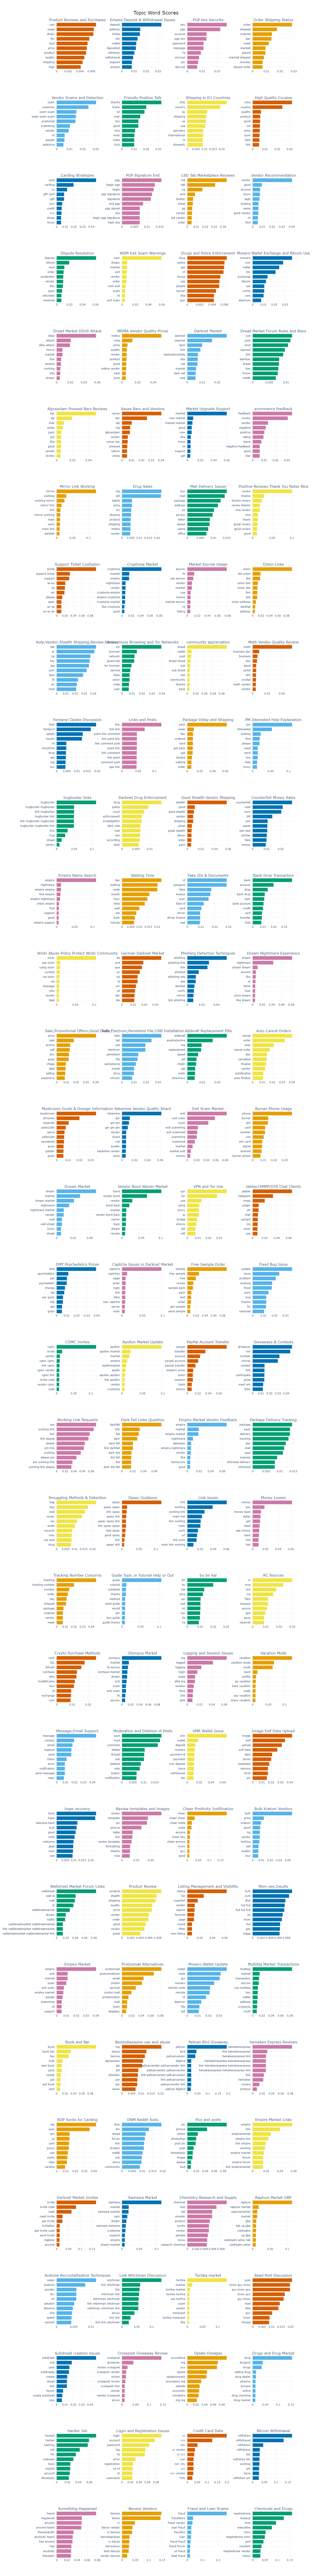
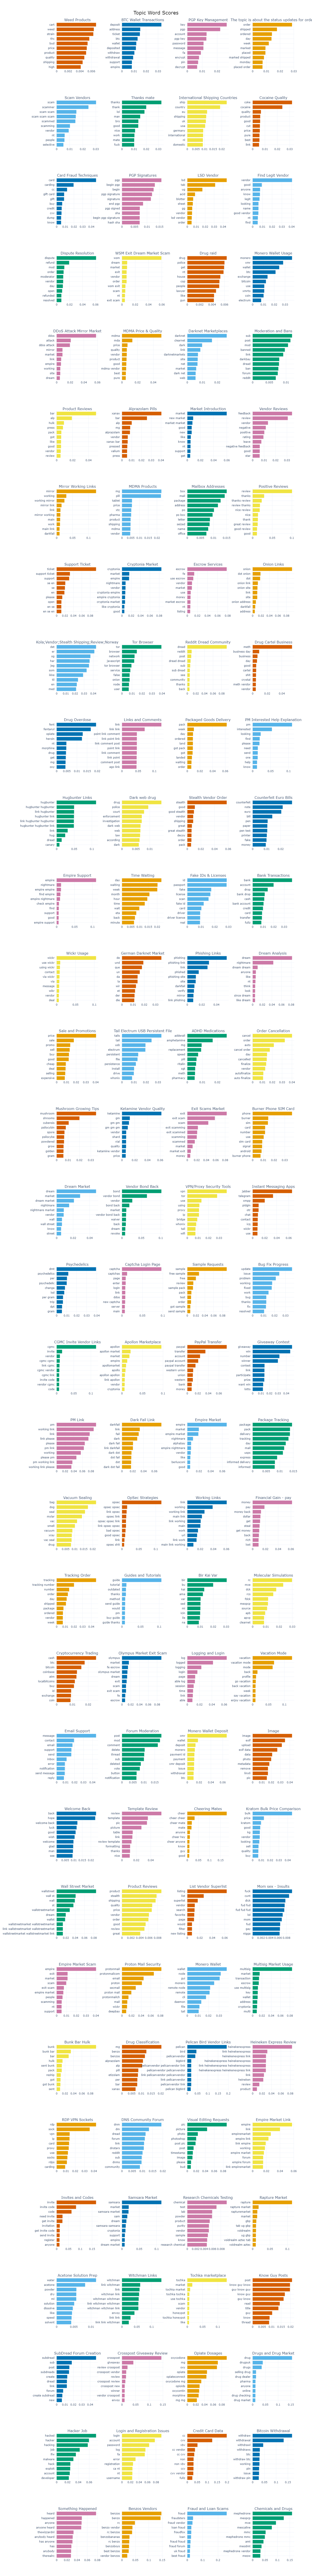

In [22]:
merged_model_content_thread.save("Merged_Models_safetensors", serialization="safetensors", save_embedding_model='all-MiniLM-L6-v2')

In [23]:
merged_model_content_thread.save("Merged_Models", save_embedding_model='all-MiniLM-L6-v2')

2024-07-27 06:18:36,908 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


# Predict Models - Usage

In [43]:
topic_model = BERTopic.load("Merged_Models", embedding_model='all-MiniLM-L12-v2')

In [46]:
sentence = ['recently closed Samsara market']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]
2024-07-31 12:36:08,635 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                                   Name      CustomName  \
0    113    290  113_samsara_market_samsara market_sam  Samsara Market   

                                      Representation  Representative_Docs  
0  [samsara, market, samsara market, sam, dream, ...                  NaN

In [47]:
sentence = ['i want to buy milk and coffee']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 14.21it/s]
2024-07-31 12:36:27,112 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                       Name                    CustomName  \
0     95    675  95_bulk_price_kratom_good  Kratom Bulk Price Comparison   

                                      Representation  Representative_Docs  
0  [bulk, price, kratom, good, kg, vendor, lookin...                  NaN

In [48]:
sentence = ['where i can found some keys account?']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]
2024-07-31 12:36:42,371 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                       Name          CustomName  \
0      2   6350  2_key_pgp_account_pgp key  PGP Key Management   

                                      Representation  Representative_Docs  
0  [key, pgp, account, pgp key, password, message...                  NaN

In [49]:
sentence = ['atk hack']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]
2024-07-31 12:36:50,380 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                          Name  CustomName  \
0    124    471  31_hacked_hacker_hacking_job  Hacker Job   

                                      Representation  Representative_Docs  
0  [hacked, hacker, hacking, job, lfw, malware, h...                  NaN

In [50]:
sentence = ['White Cut']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]
2024-07-31 12:36:59,713 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                            Name       CustomName  \
0      7   4161  7_coke_cocaine_quality_product  Cocaine Quality   

                                      Representation  Representative_Docs  
0  [coke, cocaine, quality, product, good, cut, p...                  NaN

In [51]:
sentence = ['tobacco shop']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
2024-07-31 12:37:07,692 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                   Name      CustomName  \
0     76    542  76_bag_dog_seal_mylar  Vacuum Sealing   

                                      Representation  Representative_Docs  
0  [bag, dog, seal, mylar, vac, smell, vacuum, xr...                  NaN

In [52]:
sentence = ['kush $2']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]
2024-07-31 12:37:17,686 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                    Name     CustomName  \
0      0  19104  0_cart_weed_strain_thc  Weed Products   

                                      Representation  Representative_Docs  
0  [cart, weed, strain, thc, bud, price, product,...                  NaN

In [53]:
sentence = ['berlusconi']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]
2024-07-31 12:37:24,676 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                            Name           CustomName  \
0    105   2750  105_mg_benzo_benzos_alprazolam  Drug Classification   

                                      Representation  Representative_Docs  
0  [mg, benzo, benzos, alprazolam, alp, pill, eti...                  NaN

In [54]:
sentence = ['ids']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
2024-07-31 12:37:32,563 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                         Name           CustomName  \
0     46   1623  46_id_passport_fake_license  Fake IDs & Licenses   

                                      Representation  Representative_Docs  
0  [id, passport, fake, license, scan, fake id, c...                  NaN

In [55]:
sentence = ['mannitis']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
2024-07-31 12:37:39,307 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                                     Name  \
0     56   1134  56_mushroom_shrooms_cubensis_psilocybin   

              CustomName                                     Representation  \
0  Mushroom Growing Tips  [mushroom, shrooms, cubensis, psilocybin, spor...   

   Representative_Docs  
0                  NaN

In [56]:
sentence = ['flight to Colombia to buy some stuff']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]
2024-07-31 12:37:46,483 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                               Name        CustomName  \
0     75   3821  75_package_pack_delivery_tracking  Package Tracking   

                                      Representation  Representative_Docs  
0  [package, pack, delivery, tracking, day, mail,...                  NaN

In [57]:
sentence = ['Afghanistan heroin']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]
2024-07-31 12:37:53,335 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                            Name     CustomName  \
0     36   2294  36_fent_fentanyl_opiate_heroin  Drug Overdose   

                                      Representation  Representative_Docs  
0  [fent, fentanyl, opiate, heroin, nt, morphine,...                  NaN

# HuggingFace

In [7]:
topic_model.push_to_hf_hub(
    repo_id="D0men1c0/ISSR_Dark_Web_Merged_Models_Content_Thread",
    save_embedding_model='all-MiniLM-L6-v2',
)

topic_embeddings.safetensors: 100%|██████████| 204k/204k [00:01<00:00, 142kB/s]  


CommitInfo(commit_url='https://huggingface.co/D0men1c0/ISSR_Dark_Web_Merged_Models_Content_Thread/commit/877264991aff3084a65543e4bd96fcff9b066d22', commit_message='Add BERTopic model', commit_description='', oid='877264991aff3084a65543e4bd96fcff9b066d22', pr_url=None, pr_revision=None, pr_num=None)

In [8]:
topic_model = BERTopic.load("D0men1c0/ISSR_Dark_Web_Merged_Models_Content_Thread", embedding_model='all-MiniLM-L6-v2')

In [42]:
sentence = ['recently closed Samsara market']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]
2024-07-31 12:30:27,599 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                                   Name      CustomName  \
0    113    290  113_samsara_market_samsara market_sam  Samsara Market   

                                      Representation  Representative_Docs  
0  [samsara, market, samsara market, sam, dream, ...                  NaN